In [ ]:
!pip install fastai --upgrade
!pip install nbdev

# import fastai library
from fastai.vision.all import *

In [2]:
# Download the data
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [3]:
files = get_image_files(path/"images")
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_167.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_44.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_45.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_178.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_156.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_41.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_204.jpg')...]

In [4]:
# The dataset has CAT names starting with capital letters.
# Dog names start with lower case letters
def cat_or_dog(x):
  if x[0].isupper():
    return 'CAT'
  else:
    return 'DOG'

In [5]:
doc(ImageDataLoaders.from_name_func)

In [6]:
dls = ImageDataLoaders.from_name_func(
    path, files, label_func= cat_or_dog, valid_pct = 0.2,
    seed=42, item_tfms = Resize(224)
)

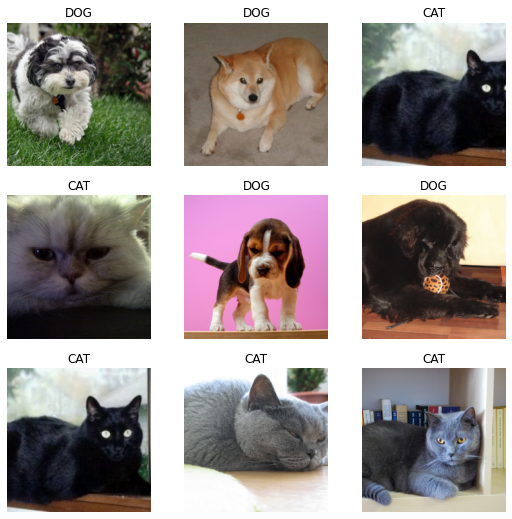

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet34, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.0008317637839354575)

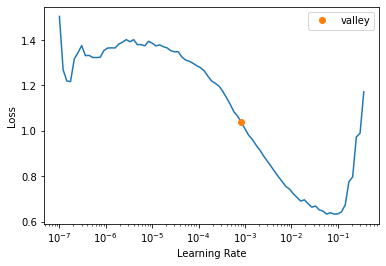

In [9]:
learn.lr_find()  #suggest_funcs=(steep, valley)

In [10]:
learn.fine_tune(1, base_lr = 0.0008317)

epoch,train_loss,valid_loss,error_rate,time
0,0.234060,0.015224,0.006089,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.046461,0.003317,0.001353,01:16


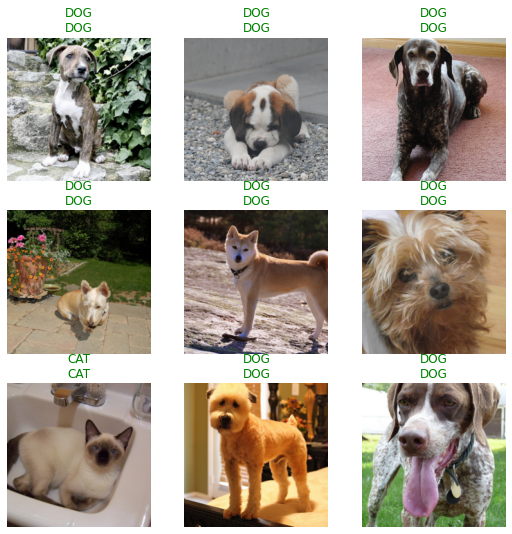

In [11]:
learn.show_results()

('CAT', tensor(0), tensor([1.0000e+00, 8.0857e-09]))
(300, 470)


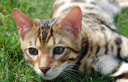

In [12]:
aaa = 12

print(learn.predict(files[aaa]))
from PIL import Image
img = Image.open(files[aaa])
print(img.shape)
img.to_thumb(128,128)

In [22]:
len(files)

7390